## EDA and cleaning of data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")
#df.reset_index(drop=True, inplace=True)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [8]:
# shows only numeric columns. also shows in 'count' 50 rows missing data in each category (total 1000)
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [9]:
df.shape

(1000, 11)

In [10]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

### 3 weather categories: calculate mean fare per weather
- presupposing that rain/snow affects/increases fare price 

In [11]:
df_weather = df["Weather"].value_counts().sum
df_weather

<bound method Series.sum of Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64>

### mean price calculated per weather shows fare is almost the same irrespective of weather - only a bit higher for rain and snow. question is if missing data is predicted, if it makes a difference?

In [12]:
mean_price_weather = df.groupby("Weather")["Trip_Price"].mean()
mean_price_weather

Weather
Clear    55.809128
Rain     59.769260
Snow     57.815842
Name: Trip_Price, dtype: float64

### Look into 4 object categories and dummy encode for plotting and ML

In [13]:
# weather, traffic conditions, day of the week, time of day
df_traffic_conditions = df["Traffic_Conditions"].value_counts().sum
df_traffic_conditions

<bound method Series.sum of Traffic_Conditions
Low       397
Medium    371
High      182
Name: count, dtype: int64>

In [14]:
df_day_of_week = df["Day_of_Week"].value_counts().sum
df_day_of_week

<bound method Series.sum of Day_of_Week
Weekday    655
Weekend    295
Name: count, dtype: int64>

In [15]:
df_time_of_day = df["Time_of_Day"].value_counts().sum
df_time_of_day

<bound method Series.sum of Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64>

### Look at mean pricing against the various categorical values

In [16]:
mean_price_traffic_conditions = df.groupby("Traffic_Conditions")["Trip_Price"].mean()
mean_price_traffic_conditions

Traffic_Conditions
High      65.059510
Low       55.597238
Medium    54.547422
Name: Trip_Price, dtype: float64

In [17]:
mean_price_day_of_week = df.groupby("Day_of_Week")["Trip_Price"].mean()
mean_price_day_of_week

Day_of_Week
Weekday    58.012418
Weekend    55.001961
Name: Trip_Price, dtype: float64

In [18]:
mean_price_time_of_day = df.groupby("Time_of_Day")["Trip_Price"].mean()
mean_price_time_of_day

Time_of_Day
Afternoon    57.958716
Evening      56.404504
Morning      55.949429
Night        56.304401
Name: Trip_Price, dtype: float64

In [19]:
# look at nulls. there are 1000 rows of data, with 50 missing in each on avg.
# this is 5% which is acceptable for validation (according to a quick google)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [20]:
# fill in missing data with 'mode' for categorical and 'mean' for numerical

df_fill = df.copy()

categorical_cols = df_fill.select_dtypes(include='object').columns
numerical_cols = df_fill.select_dtypes(include='number').columns

# mode method for categorical columns
df_fill[categorical_cols]= df_fill[categorical_cols].fillna(df_fill[categorical_cols].mode().iloc[0])
# mean method for numerical columns
df_fill[numerical_cols] = df_fill[numerical_cols].fillna(df_fill[numerical_cols].mean())


In [21]:
df_clean = pd.get_dummies(df_fill, columns=categorical_cols, drop_first=False)
df_clean

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.560000,0.800000,0.320000,53.82,36.262400,False,False,True,False,True,False,False,True,False,True,False,False
1,47.590000,1.0,3.502989,0.620000,0.430000,40.57,56.874773,True,False,False,False,True,False,True,False,False,True,False,False
2,36.870000,1.0,2.700000,1.210000,0.150000,37.27,52.903200,False,True,False,False,False,True,True,False,False,True,False,False
3,30.330000,4.0,3.480000,0.510000,0.150000,116.81,36.469800,False,True,False,False,True,False,False,True,False,True,False,False
4,27.070547,3.0,2.930000,0.630000,0.320000,22.64,15.618000,False,True,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.490000,4.0,2.390000,0.620000,0.490000,58.39,34.404900,True,False,False,False,False,True,False,False,True,True,False,False
996,45.950000,4.0,3.120000,0.610000,0.292916,61.96,62.129500,False,False,False,True,True,False,False,False,True,True,False,False
997,7.700000,3.0,2.080000,1.780000,0.292916,54.18,33.123600,False,False,True,False,True,False,False,True,False,False,True,False
998,47.560000,1.0,2.670000,0.820000,0.170000,114.94,61.209000,False,False,True,False,True,False,False,True,False,True,False,False


In [22]:
for col in ["Weather_Clear", "Weather_Rain", "Weather_Snow"]:
    mean = df_clean.loc[df_clean[col]==1, "Trip_Price"].mean()
    print(col,mean)


#mean_price_weather = df.groupby("Weather")["Trip_Price"].mean()
#mean_price_weather

Weather_Clear 55.930606062486426
Weather_Rain 59.62899876816976
Weather_Snow 57.79903675951963


In [23]:
#rank only categorical columns vs trip_price

cat_dummy_cols = [c for c in df_clean.columns if c.startswith(tuple(categorical_cols))]

cat_corr = df_clean[cat_dummy_cols + ["Trip_Price"]].corr(numeric_only=True)["Trip_Price"].drop("Trip_Price")
print(cat_corr.sort_values(ascending=False))

Traffic_Conditions_High      0.092497
Weather_Rain                 0.037838
Day_of_Week_Weekday          0.029463
Time_of_Day_Afternoon        0.019955
Weather_Snow                 0.005707
Time_of_Day_Night           -0.004431
Time_of_Day_Evening         -0.005839
Time_of_Day_Morning         -0.013801
Day_of_Week_Weekend         -0.029463
Traffic_Conditions_Low      -0.029654
Weather_Clear               -0.038100
Traffic_Conditions_Medium   -0.043360
Name: Trip_Price, dtype: float64


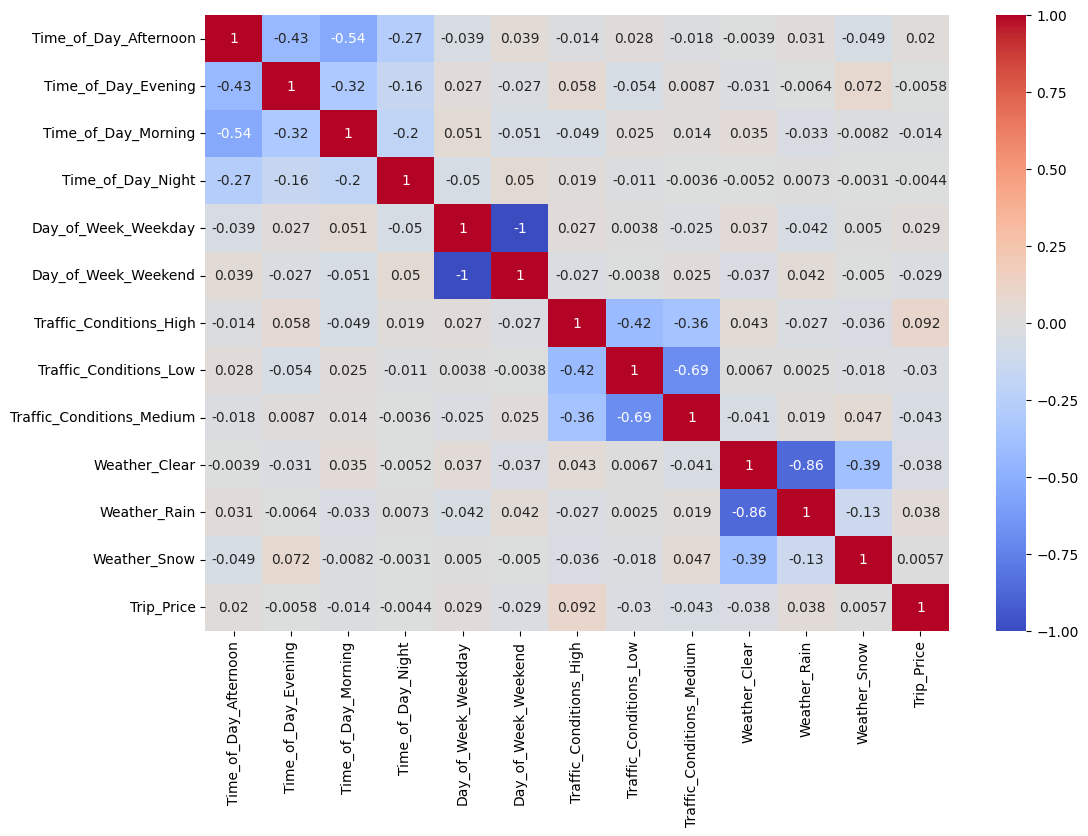

In [24]:
#plot heatmap of categorical columns in corr to Trip_Price

cat_df = df_clean[cat_dummy_cols + ["Trip_Price"]]

plt.figure(figsize=(12, 8))
sns.heatmap(cat_df.corr(numeric_only= True), annot=True, cmap='coolwarm')
plt.show()

In [25]:
corr_to_price = df_clean.corr(numeric_only=True)["Trip_Price"]
print(corr_to_price.sort_values(ascending=False))

Trip_Price                   1.000000
Trip_Distance_km             0.829685
Per_Km_Rate                  0.257674
Trip_Duration_Minutes        0.215144
Per_Minute_Rate              0.130446
Traffic_Conditions_High      0.092497
Weather_Rain                 0.037838
Base_Fare                    0.034217
Day_of_Week_Weekday          0.029463
Time_of_Day_Afternoon        0.019955
Weather_Snow                 0.005707
Time_of_Day_Night           -0.004431
Time_of_Day_Evening         -0.005839
Passenger_Count             -0.013572
Time_of_Day_Morning         -0.013801
Day_of_Week_Weekend         -0.029463
Traffic_Conditions_Low      -0.029654
Weather_Clear               -0.038100
Traffic_Conditions_Medium   -0.043360
Name: Trip_Price, dtype: float64


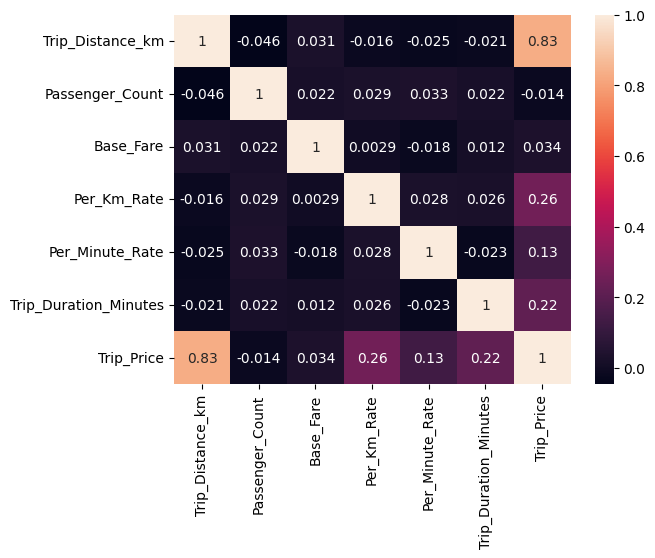

In [26]:
sns.heatmap(df_fill.corr(numeric_only=True), annot=True)
plt.show()

### do a correlation heatmap on 2 datasets:
- one with rows dropped
- one with missing values filled

In [27]:
# 1. drop any rows with missing values:
# it shows that almost half the dataset is dropped. not good
# need to fill in missing values using KNN or other to see corr

df_drop = df.dropna()
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


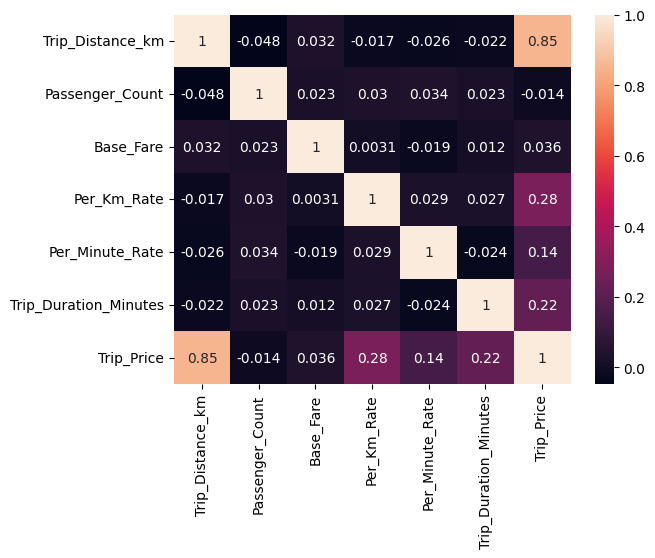

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [29]:
# heatmap shows strong relationship between trip_price and trip_distance_km - 0.85
# and small positive on per_km_rate and trip_price - 0.28
# all other numeric categories - weak relationships

### dummy encode categorical data

In [30]:
categorical_cols = ["Weather", "Time_of_Day", "Day_of_Week", "Traffic_Conditions"]
df_dummies = pd.get_dummies(df, columns=categorical_cols)
df_dummies

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Weather_Clear,Weather_Rain,Weather_Snow,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,True,False,False,False,False,True,False,True,False,False,True,False
1,47.59,1.0,NaN,0.62,0.43,40.57,NaN,True,False,False,True,False,False,False,True,False,True,False,False
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,True,False,False,False,True,False,False,False,True,True,False,False
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698,False,False,False,False,True,False,False,True,False,False,True,False
4,NaN,3.0,2.93,0.63,0.32,22.64,15.6180,True,False,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,34.4049,True,False,False,True,False,False,False,False,True,False,False,True
996,45.95,4.0,3.12,0.61,NaN,61.96,62.1295,True,False,False,False,False,False,True,True,False,False,False,True
997,7.70,3.0,2.08,1.78,NaN,54.18,33.1236,False,True,False,False,False,True,False,True,False,False,True,False
998,47.56,1.0,2.67,0.82,0.17,114.94,61.2090,True,False,False,False,False,True,False,True,False,False,True,False


### Early Conclusions:
- strong relationship btw Trip_Price in corr to trip_distance, per_km_rate and base_fare
- this seems obvious. the longer the journey, the higher the price (vehicle depreciation, fuel, driver wage)
- there is a small indication weather plays a role in corr to Trip_Price (but also a strange dataset since the most data is collected in 'clear' weather. Surely there is a higher demand for taxi in rainy weather?)
### Thoughts
- based on my own personal experience, taxi rates are calculated dynamically and value-based in corr to inclement weather and demand
- taxi companies also quote higher fares based on if you pre-book and based on density where you book from. so, the more central your journeys are, the lower the price.
- for purely data driven predictions i should put aside my preconceptions and personal experiences

In [31]:
X, y = df_clean.drop("Trip_Price", axis= 1), df_clean["Trip_Price"]

X.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.350000,3.0,3.560000,0.80,0.32,53.82,False,False,True,False,True,False,False,True,False,True,False,False
1,47.590000,1.0,3.502989,0.62,0.43,40.57,True,False,False,False,True,False,True,False,False,True,False,False
2,36.870000,1.0,2.700000,1.21,0.15,37.27,False,True,False,False,False,True,True,False,False,True,False,False
3,30.330000,4.0,3.480000,0.51,0.15,116.81,False,True,False,False,True,False,False,True,False,True,False,False
4,27.070547,3.0,2.930000,0.63,0.32,22.64,False,True,False,False,True,False,True,False,False,True,False,False


In [33]:
y.head()

0    36.262400
1    56.874773
2    52.903200
3    36.469800
4    15.618000
Name: Trip_Price, dtype: float64

## Train|test split

In [34]:
from sklearn.model_selection import train_test_split

# Train|test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

X_train

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
680,41.04,2.476842,3.78,0.850000,0.10,54.370000,True,False,False,False,True,False,False,False,True,True,False,False
177,19.95,3.000000,2.50,0.880000,0.49,62.118116,False,False,True,False,True,False,False,True,False,True,False,False
395,46.61,1.000000,2.74,1.840000,0.44,21.110000,False,True,False,False,True,False,True,False,False,True,False,False
911,14.14,4.000000,3.06,1.233316,0.49,82.160000,False,True,False,False,True,False,False,True,False,True,False,False
793,30.96,2.000000,2.96,1.240000,0.18,69.980000,True,False,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,21.11,4.000000,4.61,0.690000,0.18,84.060000,True,False,False,False,False,True,True,False,False,False,True,False
270,40.66,2.000000,3.90,0.670000,0.30,34.290000,True,False,False,False,True,False,False,False,True,True,False,False
860,39.00,1.000000,2.19,1.560000,0.43,64.810000,False,True,False,False,False,True,False,True,False,True,False,False
435,35.35,1.000000,4.20,1.210000,0.15,79.010000,False,False,True,False,True,False,False,False,True,True,False,False


In [35]:
X_test.shape

(500, 18)

In [36]:
# 50 | 50 split on the train | test data
y_train.shape, y_test.shape

((500,), (500,))

## Feature scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

scaler

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [38]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((500, 18), (500, 18))

In [39]:
scaled_X_train.min(), scaled_X_train.max()

(np.float64(0.0), np.float64(1.0))

In [40]:
scaled_X_test.min(), scaled_X_test.max()

(np.float64(-0.004285464404407913), np.float64(1.0))

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
model_linear.fit(scaled_X_train, y_train)
model_linear.coef_

array([ 2.52069985e+02, -1.43863716e+00,  2.94730975e+00,  3.93170798e+01,
        2.04219847e+01,  3.37346473e+01,  8.65989393e-01, -2.14412853e+00,
        4.87622451e-01,  7.90516689e-01,  2.06768040e-01, -2.06768040e-01,
       -1.79893036e+00,  8.80123570e-01,  9.18806794e-01, -1.02894018e+00,
       -3.81303568e-01,  1.41024375e+00])

In [44]:
model_linear.intercept_

np.float64(-34.5926427403244)

## Prediction

In [45]:
test_sample_features = scaled_X_test[0].reshape(1, -1)
test_sample_target = y_test.values[0]

test_sample_features, test_sample_target

(array([[0.12724645, 0.33333333, 0.85284281, 0.82      , 0.85      ,
         0.87222319, 0.        , 0.        , 0.        , 1.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        ]]),
 np.float64(84.873))

In [46]:
model_linear.predict(test_sample_features)

array([79.38771647])

In [47]:
test_sample_target

np.float64(84.873)

## Prediction on test data

In [48]:
y_pred = model_linear.predict(scaled_X_test)
y_pred.shape

(500,)

In [49]:
y_test.shape

(500,)

In [50]:
y_pred[:5]

array([ 79.38771647,  90.81132677,  65.30756534,  74.51873439,
       121.28287182])

In [51]:
y_test[:5].values

array([ 84.873 ,  84.7232,  62.2353,  85.4652, 123.928 ])

## Evaluate model

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"{mse = : .2f}")
print(f"{mae = :.2f}") # ': .2f' adjust to 2 decimals
print(f"{rmse = : .2f}")

mse =  276.01
mae = 10.87
rmse =  16.61


In [55]:
# average trip price
# mae is ≈ 11, (11/57)  - 20% off
# rmse is 16.61 (16.61/57) - 30% off
# model is off in error margin by 1/5 to 1/3. either the dummies create the errors
# or linear regr is not a good model for this set
df_clean["Trip_Price"].mean()

np.float64(56.87477332571041)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip_Distance_km           1000 non-null   float64
 1   Passenger_Count            1000 non-null   float64
 2   Base_Fare                  1000 non-null   float64
 3   Per_Km_Rate                1000 non-null   float64
 4   Per_Minute_Rate            1000 non-null   float64
 5   Trip_Duration_Minutes      1000 non-null   float64
 6   Trip_Price                 1000 non-null   float64
 7   Time_of_Day_Afternoon      1000 non-null   bool   
 8   Time_of_Day_Evening        1000 non-null   bool   
 9   Time_of_Day_Morning        1000 non-null   bool   
 10  Time_of_Day_Night          1000 non-null   bool   
 11  Day_of_Week_Weekday        1000 non-null   bool   
 12  Day_of_Week_Weekend        1000 non-null   bool   
 13  Traffic_Conditions_High    1000 non-null   bool  

In [65]:
df_clean[:20]

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
0,19.350000,3.000000,3.560000,0.800000,0.320000,53.820000,36.262400,False,False,True,False,True,False,False,True,False,True,False,False
1,47.590000,1.000000,3.502989,0.620000,0.430000,40.570000,56.874773,True,False,False,False,True,False,True,False,False,True,False,False
2,36.870000,1.000000,2.700000,1.210000,0.150000,37.270000,52.903200,False,True,False,False,False,True,True,False,False,True,False,False
3,30.330000,4.000000,3.480000,0.510000,0.150000,116.810000,36.469800,False,True,False,False,True,False,False,True,False,True,False,False
4,27.070547,3.000000,2.930000,0.630000,0.320000,22.640000,15.618000,False,True,False,False,True,False,True,False,False,True,False,False
5,8.640000,2.000000,2.550000,1.710000,0.480000,89.330000,60.202800,True,False,False,False,False,True,False,False,True,True,False,False
6,3.850000,4.000000,3.510000,1.660000,0.292916,5.050000,11.264500,True,False,False,False,True,False,True,False,False,False,True,False
7,43.440000,3.000000,2.970000,1.870000,0.230000,62.118116,101.121600,False,True,False,False,False,True,False,True,False,True,False,False
8,30.450000,3.000000,2.770000,1.780000,0.340000,110.330000,56.874773,False,False,True,False,True,False,True,False,False,True,False,False
9,35.700000,2.000000,3.390000,1.520000,0.470000,62.118116,75.565700,True,False,False,False,True,False,False,True,False,False,True,False


## Feature engineering

### thoughts on results of Linear Regression
